<a href="https://colab.research.google.com/github/beni2408/Pneumonia-/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/x_rays'
classes = os.listdir(path)
print(classes)

['test', 'train', 'val']


In [ ]:
Pnemonia_dir = os.path.join(path + '/' + classes[0])
Normal_dir = os.path.join(path + '/' + classes[1])

# Create lists of the file names in each directory
Pnemonia = os.listdir(Pnemonia_dir)
Normal = os.listdir(Normal_dir)

print('There are ', len(Normal),
      'images of pneumonia infected in training dataset')
print('There are ', len(Pnemonia), 'normal images in training dataset')



There are  3 images of pneumonia infected in training dataset
There are  3 normal images in training dataset


In [ ]:

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(16, 8)

# Select the starting index for the images to display
pic_index = 210

# Create lists of the file paths for the 16 images to display
pneumonia_images = [os.path.join(Pnemonia_dir, fname)
                    for fname in Pnemonia[pic_index-8:pic_index]]
# Loop through the image paths and display each image in a subplot
for i, img_path in enumerate(pneumonia_images):
    sp = plt.subplot(2, 4, i+1)
    sp.axis('Off')

    # Read in the image using Matplotlib's imread() function
    img = mpimg.imread(img_path)
    plt.imshow(img)

# Display the plot with the 16 images in a 4x4
plt.show()

<Figure size 1600x800 with 0 Axes>

In [ ]:
# Set the figure size
fig = plt.gcf()
fig.set_size_inches(16, 8)

# Select the starting index for the images to display
pic_index = 210

# Create lists of the file paths for the 16 images to display
normal_images = [os.path.join(Normal_dir, fname)
			for fname in Normal[pic_index-8:pic_index]]
# Loop through the image paths and display each image in a subplot
for i, img_path in enumerate(normal_images):
	sp = plt.subplot(2, 4, i+1)
	sp.axis('Off')

	# Read in the image using Matplotlib's imread() function
	img = mpimg.imread(img_path)
	plt.imshow(img)

# Display the plot with the 16 images in a 4x4 grid
plt.show()


<Figure size 1600x800 with 0 Axes>

In [ ]:
Train = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/x_rays/train',
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(256, 256))
Test = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/x_rays/test',
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(256, 256))
Validation = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/x_rays/val',
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(256, 256))

Found 5216 files belonging to 2 classes.
Found 622 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(2, activation='sigmoid')
])

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

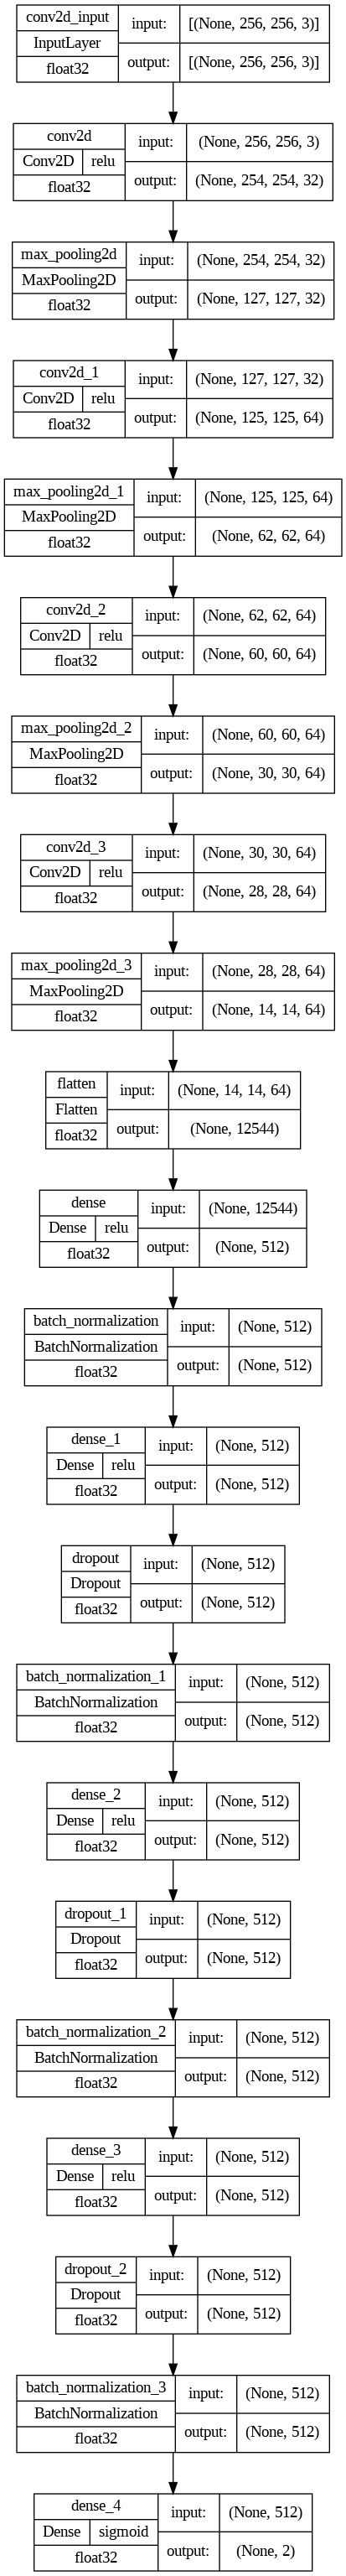

In [ ]:

# Plot the keras model
keras.utils.plot_model(
    model,
    # show the shapes of the input/output tensors of each layer
    show_shapes=True,
    # show the data types of the input/output tensors of each layer
    show_dtype=True,
    # show the activations of each layer in the output graph
    show_layer_activations=True
)

In [ ]:
model.compile(
	# specify the loss function to use during training
	loss='binary_crossentropy',
	# specify the optimizer algorithm to use during training
	optimizer='adam',
	# specify the evaluation metrics to use during training
	metrics=['accuracy']
)


In [ ]:
history = model.fit(Train,
          epochs=20,
          validation_data=Validation)

Epoch 1/20
163/163 [==============================] - 727s 4s/step - loss: 0.0314 - accuracy: 0.9893 - val_loss: 0.3100 - val_accuracy: 0.9375
Epoch 2/20
163/163 [==============================] - 736s 5s/step - loss: 0.0366 - accuracy: 0.9860 - val_loss: 5.7519 - val_accuracy: 0.5625
Epoch 3/20
163/163 [==============================] - 722s 4s/step - loss: 0.0267 - accuracy: 0.9904 - val_loss: 0.0853 - val_accuracy: 1.0000
Epoch 4/20
163/163 [==============================] - 730s 4s/step - loss: 0.0167 - accuracy: 0.9937 - val_loss: 1.4015 - val_accuracy: 0.7500
Epoch 5/20
163/163 [==============================] - 740s 5s/step - loss: 0.0233 - accuracy: 0.9923 - val_loss: 8.6052 - val_accuracy: 0.5000
Epoch 6/20
163/163 [==============================] - 733s 4s/step - loss: 0.0164 - accuracy: 0.9942 - val_loss: 0.8557 - val_accuracy: 0.6875
Epoch 7/20
163/163 [==============================] - 739s 5s/step - loss: 0.0265 - accuracy: 0.9912 - val_loss: 0.1918 - val_accuracy: 0.8750

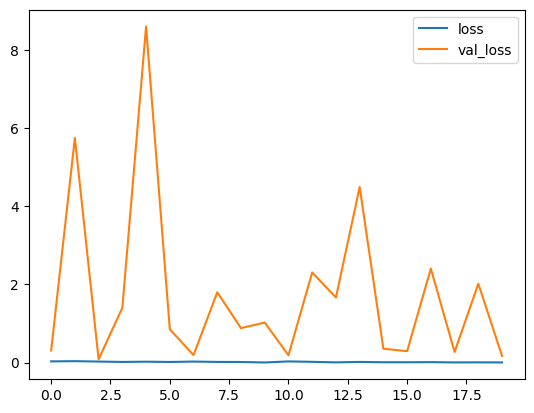

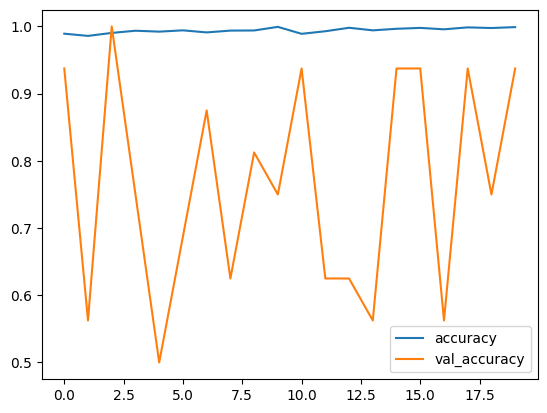

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

In [ ]:

loss, accuracy = model.evaluate(Test)
print('The accuracy of the model on test dataset is',
      np.round(accuracy*100))

20/20 [==============================] - 232s 7s/step - loss: 0.8095 - accuracy: 0.8585
The accuracy of the model on test dataset is 86.0


In [ ]:
loss, test_accuracy = model.evaluate(Test)
print('The accuracy of the model on test dataset is', np.round(test_accuracy * 100))

# Assuming you have a separate validation dataset, let's call it Validation
loss, validation_accuracy = model.evaluate(Validation)
print('The accuracy of the model on validation dataset is', np.round(validation_accuracy * 100))


20/20 [==============================] - 40s 2s/step - loss: 0.8095 - accuracy: 0.8585
The accuracy of the model on test dataset is 86.0
1/1 [==============================] - 1s 1s/step - loss: 0.1713 - accuracy: 0.9375
The accuracy of the model on validation dataset is 94.0


1/1 [==============================] - 1s 643ms/step
Result:Affected by Pneumonia


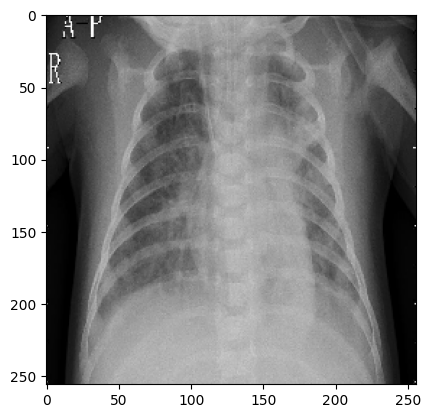

In [ ]:
# Load the image from the directory
# "/content/chest_xray/chest_xray/test/NORMAL/IM-0010-0001.jpeg"
# with the target size of (256, 256)
test_image = tf.keras.utils.load_img(
	"/content/drive/MyDrive/x_rays/val/PNEUMONIA/person1946_bacteria_4874.jpeg",
	target_size=(256, 256))

# Display the loaded image
plt.imshow(test_image)

# Convert the loaded image into a NumPy array and
# expand its dimensions to match the expected input shape of the model
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Use the trained model to make a prediction on the input image
result = model.predict(test_image)

# Extract the probability of the input image belonging
# to each class from the prediction result
class_probabilities = result[0]

# Determine the class with the highest probability and print its label
if class_probabilities[0] > class_probabilities[1]:
	print("Result: Normal")
else:
	print("Result:Affected by Pneumonia")


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the main directory containing your dataset
data_path = '/content/drive/MyDrive/x_rays'

# Define image size and batch size
img_size = (256, 256)
batch_size = 32

# Create an ImageDataGenerator with augmentation settings for training data
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255  # Normalize pixel values to be between 0 and 1
)

# Create an ImageDataGenerator without augmentation for validation and test data
validation_test_datagen = ImageDataGenerator(rescale=1./255)

# Load images for the training set with augmentation
train_generator = train_datagen.flow_from_directory(
    data_path,
    classes=['Normal', 'Pneumonia'],
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load images for the validation set without augmentation
validation_generator = validation_test_datagen.flow_from_directory(
    data_path,
    classes=['Normal', 'Pneumonia'],
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load images for the test set without augmentation
test_generator = validation_test_datagen.flow_from_directory(
    data_path,
    classes=['Normal', 'Pneumonia'],
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False for the test set
)

# Apply data augmentation to the training set using tf.data.Dataset.map
def apply_augmentation(image, label):
    image = tf.numpy_function(lambda x: train_datagen.random_transform(x), [image], tf.float32)
    return image, label

# Convert the generator to a tf.data.Dataset
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, img_size[0], img_size[1], 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 2), dtype=tf.float32)
    )
)

# Apply data augmentation using map
train_augmented = train_dataset.map(apply_augmentation)


Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions on the test set
y_pred = model.predict(Test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert true labels to class labels
y_true = np.argmax(np.concatenate([y for x, y in Test]), axis=1)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Calculate precision, recall, and F1-score
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Display the confusion matrix using a heatmap with a different color map ("Oranges")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
path = '/content/drive/MyDrive/Kaggle DS2'
classes = os.listdir(path)
print(classes)

['Test', 'Train', 'Validation']


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the main directory containing your dataset
data_path = '/content/drive/MyDrive/x_rays'

# Define the paths to the pneumonia and normal directories
pneumonia_dir = os.path.join(data_path, 'Pneumonia')
normal_dir = os.path.join(data_path, 'Normal')

# Define image size and batch size
img_size = (256, 256)
batch_size = 32

# Create an ImageDataGenerator with augmentation settings for training data
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255  # Normalize pixel values to be between 0 and 1
)

# Create an ImageDataGenerator without augmentation for validation and test data
validation_test_datagen = ImageDataGenerator(rescale=1./255)

# Load images for the training set with augmentation
train_generator = train_datagen.flow_from_directory(
    data_path,
    classes=['Normal', 'Pneumonia'],
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load images for the validation set without augmentation
validation_generator = validation_test_datagen.flow_from_directory(
    data_path,
    classes=['Normal', 'Pneumonia'],
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load images for the test set without augmentation
test_generator = validation_test_datagen.flow_from_directory(
    data_path,
    classes=['Normal', 'Pneumonia'],
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False for the test set
)




Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
!pip install keras-tuner

from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

# Define the model building function
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
    model.add(layers.MaxPooling2D(2, 2))

    for i in range(hp.Int('num_conv_layers', min_value=1, max_value=3)):
        model.add(layers.Conv2D(hp.Int(f'conv_{i}_units', min_value=32, max_value=128, step=32), (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D(2, 2))

    model.add(layers.Flatten())
    model.add(layers.Dense(hp.Int('dense_units', min_value=128, max_value=512, step=128), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(2, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create a Keras Tuner RandomSearch object
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,  # Adjust as needed
    directory='hyperparameter_tuning',
    project_name='pneumonia_detection'
)

# Search for the best hyperparameter configuration
tuner.search(Train, epochs=10, validation_data=Validation)

# Get the best hyperparameter configuration
best_hp = tuner.get_best_hyperparameters()[0]

# Build the final model with the best hyperparameters
final_model = tuner.hypermodel.build(best_hp)

# Train the final model
final_model.fit(Train, epochs=10, validation_data=Validation)

Trial 1 Complete [02h 18m 36s]
val_accuracy: 0.5625

Best val_accuracy So Far: 0.5625
Total elapsed time: 02h 18m 36s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
2                 |2                 |num_conv_layers
128               |96                |conv_0_units
128               |384               |dense_units
0.2               |0.2               |dropout
0.00021921        |0.005204          |learning_rate
32                |32                |conv_1_units

Epoch 1/10
163/163 [==============================] - 929s 6s/step - loss: 0.2856 - accuracy: 0.8944 - val_loss: 0.3800 - val_accuracy: 0.8750
Epoch 2/10
163/163 [==============================] - 933s 6s/step - loss: 0.1687 - accuracy: 0.9492 - val_loss: 1.2236 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 929s 6s/step - loss: 0.1171 - accuracy: 0.9647 - val_loss: 0.5607 - val_accuracy: 0.7500
Epoch 4/10
163/163 [==============================] - 921s 6s/step -

***Investigate Overfitting and Adjust Hyperparameters:***




In [ ]:
# Modify the build_model function in the hyperparameter tuning code
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
    model.add(layers.MaxPooling2D(2, 2))

    for i in range(hp.Int('num_conv_layers', min_value=1, max_value=3)):
        model.add(layers.Conv2D(hp.Int(f'conv_{i}_units', min_value=32, max_value=128, step=32),
                                (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D(2, 2))

    model.add(layers.Flatten())
    model.add(layers.Dense(hp.Int('dense_units', min_value=128, max_value=512, step=128), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(2, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Rerun the hyperparameter tuning process with the modified build_model function


**Data Augumentation**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with augmentation settings
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load images from the directory
Train = image_dataset_from_directory(
    directory='/content/drive/MyDrive/Kaggle DS2/Train',
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42,
    validation_split=0.2,  # Use 20% of the data for validation
    subset="training"
)

# Define a function to apply data augmentation to a batch
def apply_augmentation(images, labels):
    images = tf.numpy_function(lambda x: data_augmentation.flow(x, shuffle=False)[0], [images], tf.float32)
    return images, labels

# Apply data augmentation to the training set using the map method
Train_augmented = Train.map(apply_augmentation)

# Load images for the validation set without augmentation
Validation = image_dataset_from_directory(
    directory='/content/drive/MyDrive/Kaggle DS2/Validation',
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42,
    validation_split=0.2,  # Use 20% of the data for validation
    subset="validation"
)


Found 350 files belonging to 2 classes.
Using 280 files for training.
Found 16 files belonging to 2 classes.
Using 3 files for validation.


Learning Rate Adjustment

In [ ]:
# Modify the learning rate in the model compilation
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),  # Adjust the learning rate as needed
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Rerun the model training with the modified learning rate
history_lr_adjusted = model.fit(Train, epochs=40, validation_data=Validation)


Epoch 1/40
9/9 [==============================] - 41s 4s/step - loss: 0.2665 - accuracy: 0.9143 - val_loss: 7.8860 - val_accuracy: 0.3333
Epoch 2/40
9/9 [==============================] - 39s 4s/step - loss: 0.2124 - accuracy: 0.9393 - val_loss: 7.9538 - val_accuracy: 0.3333
Epoch 3/40
9/9 [==============================] - 36s 4s/step - loss: 0.1111 - accuracy: 0.9571 - val_loss: 7.1021 - val_accuracy: 0.3333
Epoch 4/40
9/9 [==============================] - 39s 4s/step - loss: 0.1147 - accuracy: 0.9643 - val_loss: 6.3365 - val_accuracy: 0.3333
Epoch 5/40
9/9 [==============================] - 36s 4s/step - loss: 0.1808 - accuracy: 0.9607 - val_loss: 5.9967 - val_accuracy: 0.3333
Epoch 6/40
9/9 [==============================] - 36s 4s/step - loss: 0.0892 - accuracy: 0.9714 - val_loss: 5.4439 - val_accuracy: 0.3333
Epoch 7/40
9/9 [==============================] - 39s 4s/step - loss: 0.1227 - accuracy: 0.9500 - val_loss: 5.2695 - val_accuracy: 0.3333
Epoch 8/40
9/9 [==================

Evaluate on test set

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(Test)
print('The accuracy of the model on the test dataset is', np.round(accuracy*100))


11/11 [==============================] - 18s 1s/step - loss: 0.0522 - accuracy: 0.9829
The accuracy of the model on the test dataset is 98.0


1/1 [==============================] - 0s 312ms/step
Pneumonia


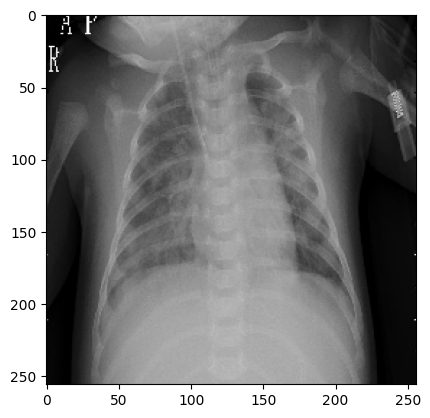

In [ ]:
# Load the image from the directory
# "/content/chest_xray/chest_xray/test/NORMAL/IM-0010-0001.jpeg"
# with the target size of (256, 256)
test_image = tf.keras.utils.load_img(
	"/content/drive/MyDrive/Kaggle Dataset/val/PNEUMONIA/person1946_bacteria_4875.jpeg",
	target_size=(256, 256))

# Display the loaded image
plt.imshow(test_image)

# Convert the loaded image into a NumPy array and
# expand its dimensions to match the expected input shape of the model
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Use the trained model to make a prediction on the input image
result = model.predict(test_image)

# Extract the probability of the input image belonging
# to each class from the prediction result
class_probabilities = result[0]

# Determine the class with the highest probability and print its label
if class_probabilities[0] > class_probabilities[1]:
	print("Normal")
else:
	print("Pneumonia")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions on the test set
y_pred = model.predict(Test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert true labels to class labels
y_true = np.argmax(np.concatenate([y for x, y in Test]), axis=1)

# Generate a classification report
class_report = classification_report(y_true, y_pred_classes, target_names=['Normal', 'Pneumonia'])
print("Classification Report:\n", class_report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

# Calculate precision, recall, sensitivity, specificity, and F1 score
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
sensitivity = recall
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)


11/11 [==============================] - 19s 1s/step
Classification Report:
               precision    recall  f1-score   support

      Normal       0.33      0.34      0.33       110
   Pneumonia       0.69      0.69      0.69       240

    accuracy                           0.58       350
   macro avg       0.51      0.51      0.51       350
weighted avg       0.58      0.58      0.58       350

Confusion Matrix:
 [[ 37  73]
 [ 75 165]]
Precision: 0.6932773109243697
Recall (Sensitivity): 0.6875
Specificity: 0.33636363636363636
F1 Score: 0.6903765690376569


11/11 [==============================] - 16s 1s/step
Accuracy: 0.5657142857142857
Precision: 0.6848739495798319
Recall (Sensitivity): 0.6791666666666667
F1 Score: 0.6820083682008368
AUC-ROC: 0.5139393939393939


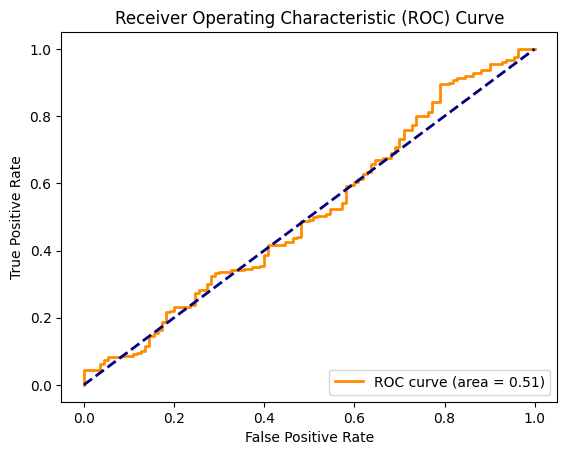

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Generate predictions on the test set
y_pred = model.predict(Test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert true labels to class labels
y_true = np.argmax(np.concatenate([y for x, y in Test]), axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_true, y_pred_classes)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_true, y_pred_classes)
print("Recall (Sensitivity):", recall)

# Calculate F1 score
f1 = f1_score(y_true, y_pred_classes)
print("F1 Score:", f1)

# Calculate AUC-ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred[:, 1])
roc_auc = auc(fpr, tpr)
print("AUC-ROC:", roc_auc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


11/11 [==============================] - 22s 1s/step


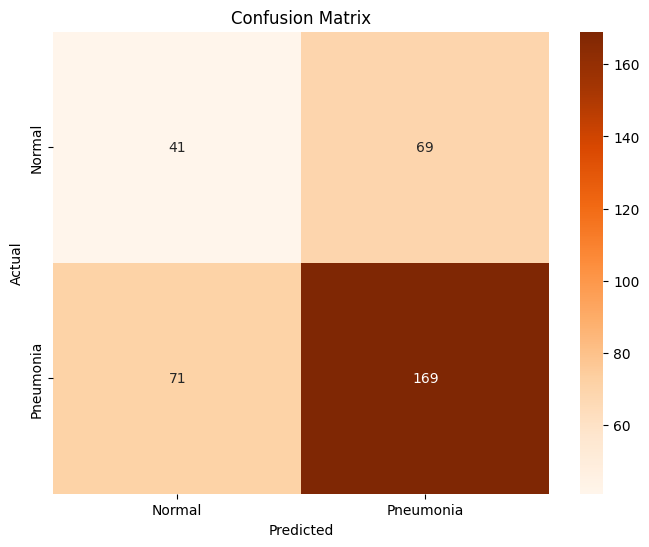

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions on the test set
y_pred = model.predict(Test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Extract true labels directly from the Test dataset
y_true = np.concatenate([y for x, y in Test], axis=0)
y_true_classes = np.argmax(y_true, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Display the confusion matrix using a heatmap with a different color map ("Oranges")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


11/11 [==============================] - 17s 1s/step


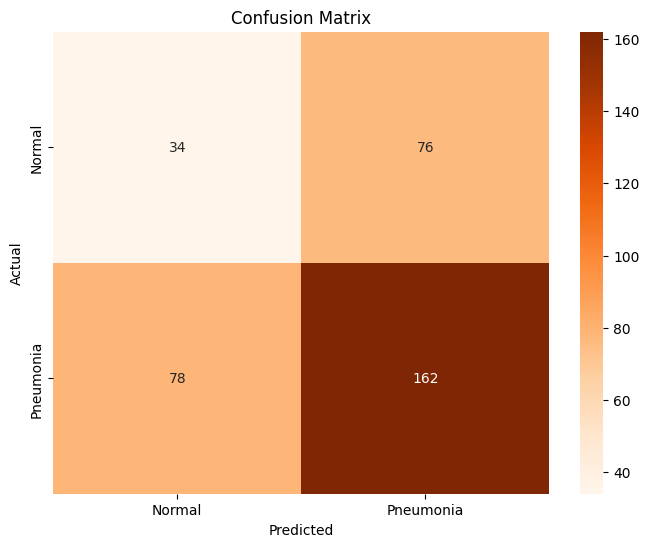

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions on the test set
y_pred = model.predict(Test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Extract true labels directly from the Test dataset
y_true = np.concatenate([y for _, y in Test], axis=0)
y_true_classes = np.argmax(y_true, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Display the confusion matrix using a heatmap with a different color map ("Oranges")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


11/11 [==============================] - 16s 1s/step
Precision: 0.6848739495798319
Recall: 0.6791666666666667
F1 Score: 0.6820083682008368


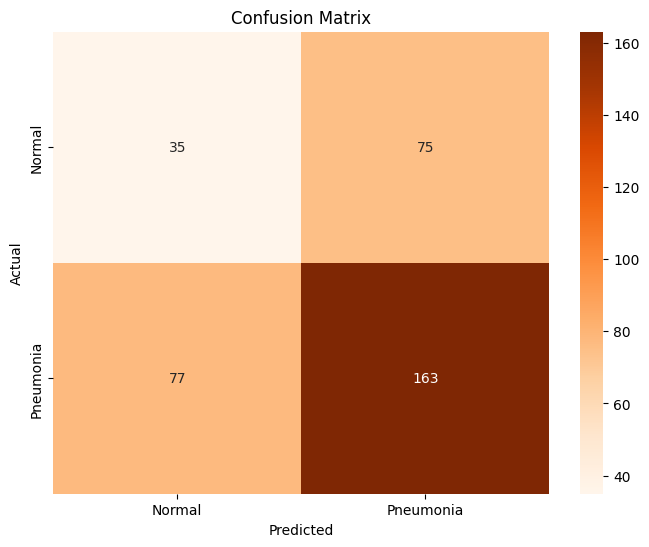

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions on the test set
y_pred = model.predict(Test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert true labels to class labels
y_true = np.argmax(np.concatenate([y for x, y in Test]), axis=1)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Calculate precision, recall, and F1-score
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Display the confusion matrix using a heatmap with a different color map ("Oranges")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


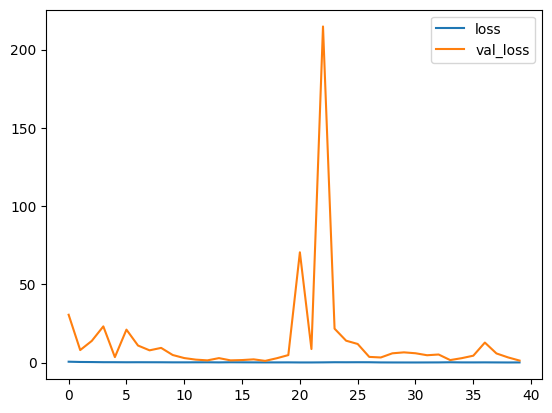

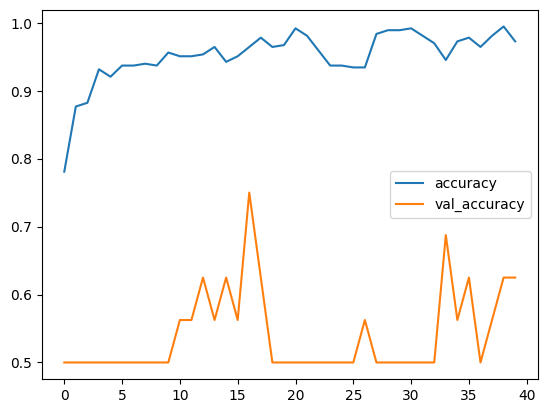

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define a learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Add batch normalization and learning rate reduction callback
model = tf.keras.models.Sequential([
    # ... (your existing layers)
    layers.BatchNormalization(),
    # ... (your existing layers)
])

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model with data augmentation and learning rate reduction
history = model.fit(
    Train_augmented,
    epochs=40,
    validation_data=Validation,
    callbacks=[reduce_lr]  # Add the learning rate reduction callback
)
